In [1]:
path3=r'C:\Users\84280\Desktop\lianxi\SVM\ex6data3.mat'
path2=r'C:\Users\84280\Desktop\lianxi\SVM\ex6data2.mat'
path1=r'C:\Users\84280\Desktop\lianxi\SVM\ex6data1.mat'



In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat


In [3]:
raw_data=loadmat(path1)
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

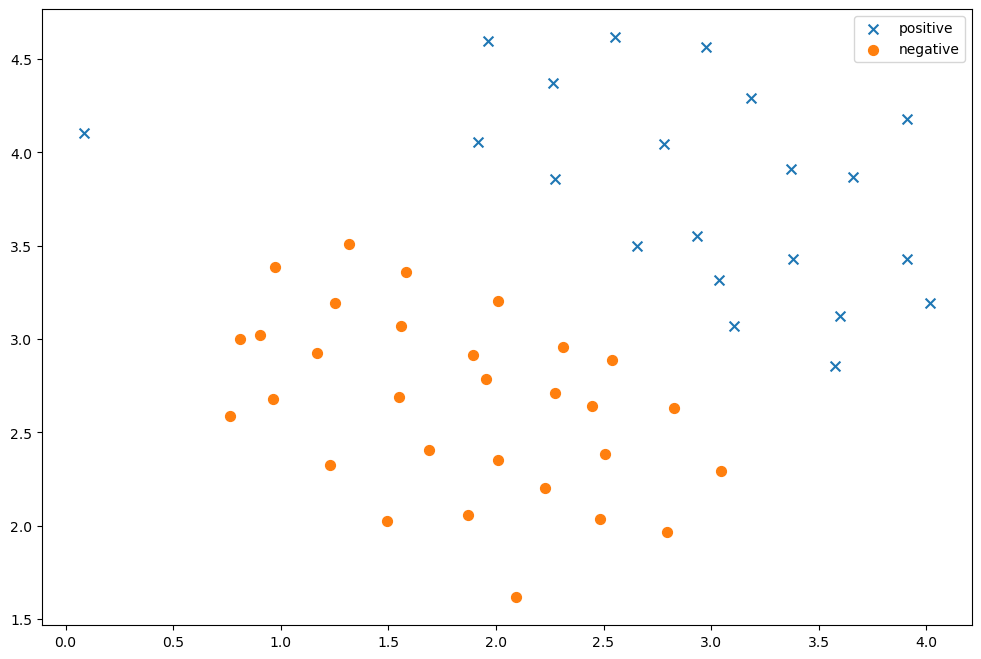

In [4]:
data=pd.DataFrame(raw_data['X'],columns=['X1','X2'])
data['y']=raw_data['y']

positive=data[data['y'].isin([1])]
negative=data[data['y'].isin([0])]
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'],positive['X2'],s=50,marker='x',label='positive')
ax.scatter(negative['X1'],negative['X2'],s=50,marker='o',label='negative')
ax.legend()

In [5]:
from sklearn import svm
svc = svm.LinearSVC(C=1,loss='hinge',max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

In [6]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])


E:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9803921568627451

In [7]:
svc2 = svm.LinearSVC(C=100,loss='hinge',max_iter=1000)
svc2.fit(data[['X1','X2']],data['y'])
svc2.score(data[['X1','X2']],data['y'])

E:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9215686274509803

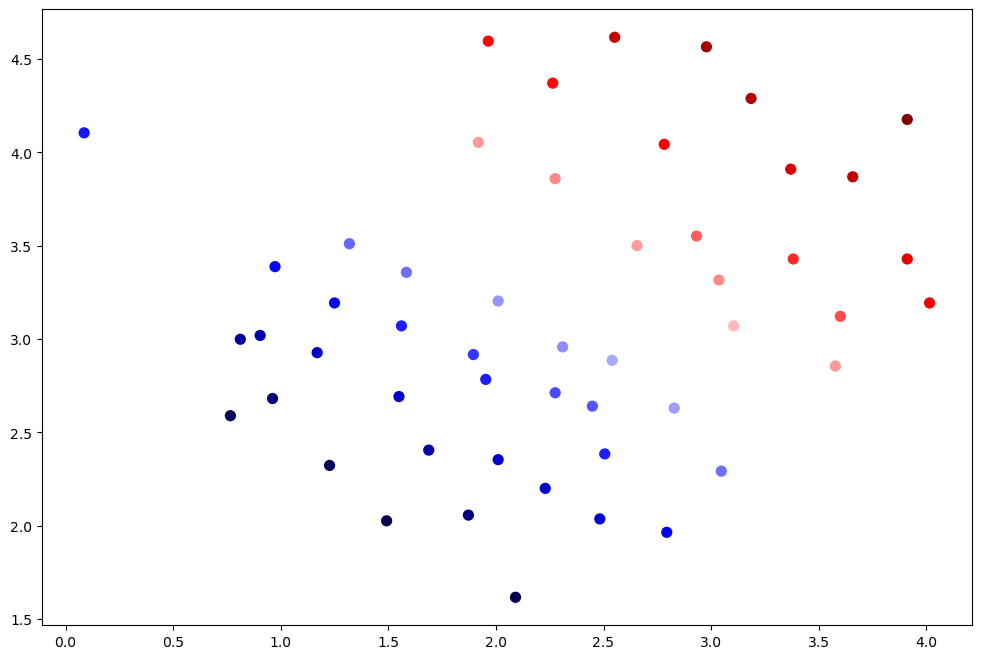

In [8]:
data['SVM 1 confidece']=svc.decision_function(data[['X1','X2']])

fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(data['X1'],data['X2'],s=50,c=data['SVM 1 confidece'],cmap='seismic')
plt.show()

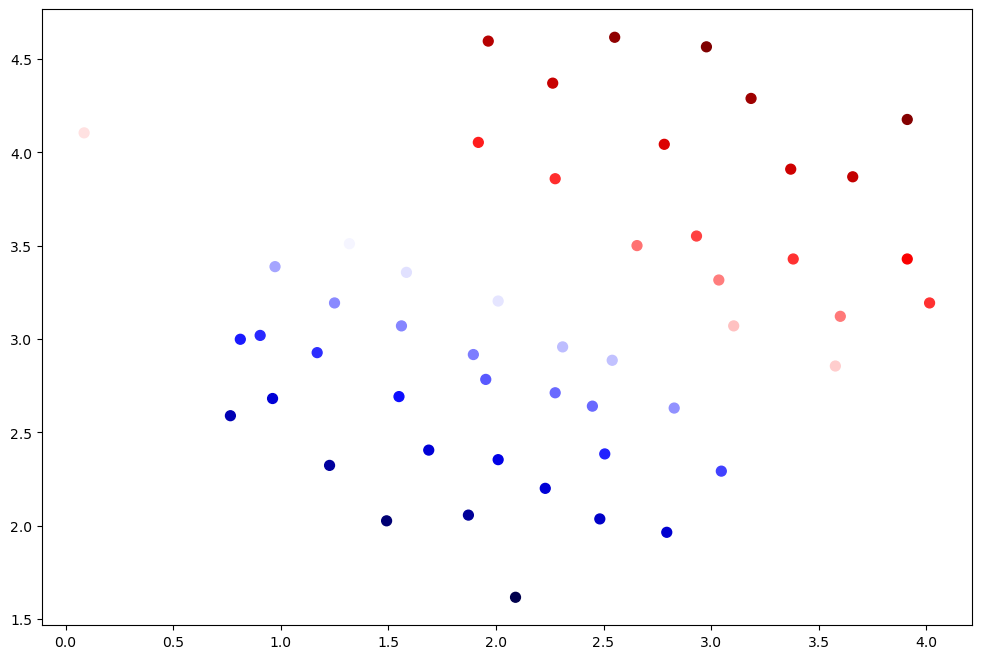

In [9]:
data['SVM 2 confidence']=svc2.decision_function(data[['X1','X2']])
fig,ax=plt.subplots(figsize=((12,8)))
plt.scatter(data[['X1']],data['X2'],s=50,c=data['SVM 2 confidence'], cmap='seismic')
plt.show()

In [10]:
def gaussian_kernel(x1,x2,sigma):
    return np.exp(-(np.sum((x1-x2)**2))/(2*(sigma**2)))

In [ ]:
x1=np.array([1.0,2.0,1.0])
x2=np.array([0.0,4.0,-1.0])
sigma=2

gass